In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [3]:
stock = "MSFT"
microsoft_data = yf.download(stock, start, end)

C:\Users\Thani\AppData\Local\Temp\ipykernel_45976\3929481738.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  microsoft_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
microsoft_data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2005-08-01,18.030659,18.121090,17.919358,17.954139,61346800
2005-08-02,18.649755,18.712362,17.995867,18.016735,137510100
2005-08-03,18.955843,19.081056,18.594116,18.614986,139422400
2005-08-04,19.004528,19.129741,18.816708,18.893228,91461400
2005-08-05,19.310610,19.435823,18.955840,18.983666,82212400


In [5]:
microsoft_data.shape

(5031, 5)

In [6]:
microsoft_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,113.558702,114.597982,112.405766,113.513041,4.295842e+07
std,129.598615,130.711300,128.332729,129.536033,2.809755e+07
min,11.177744,11.524510,10.971156,11.214634,7.164500e+06
25%,21.232641,21.402673,20.994059,21.233740,2.399255e+07
50%,40.803806,41.144931,40.426407,40.768555,3.527060e+07
75%,195.728859,199.580261,193.753638,196.303994,5.379730e+07
max,513.710022,518.289978,511.559998,515.530029,5.910522e+08


In [7]:
microsoft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-08-01 to 2025-07-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   5031 non-null   float64
 1   (High, MSFT)    5031 non-null   float64
 2   (Low, MSFT)     5031 non-null   float64
 3   (Open, MSFT)    5031 non-null   float64
 4   (Volume, MSFT)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [8]:
microsoft_data.isna().sum()

Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
microsoft_data["Close"]["MSFT"]

Date
2005-08-01     18.030659
2005-08-02     18.649755
2005-08-03     18.955843
2005-08-04     19.004528
2005-08-05     19.310610
                 ...    
2025-07-24    510.880005
2025-07-25    513.710022
2025-07-28    512.500000
2025-07-29    512.570007
2025-07-30    513.239990
Name: MSFT, Length: 5031, dtype: float64

Text(0.5, 1.0, 'Closing price of Microsoft data')

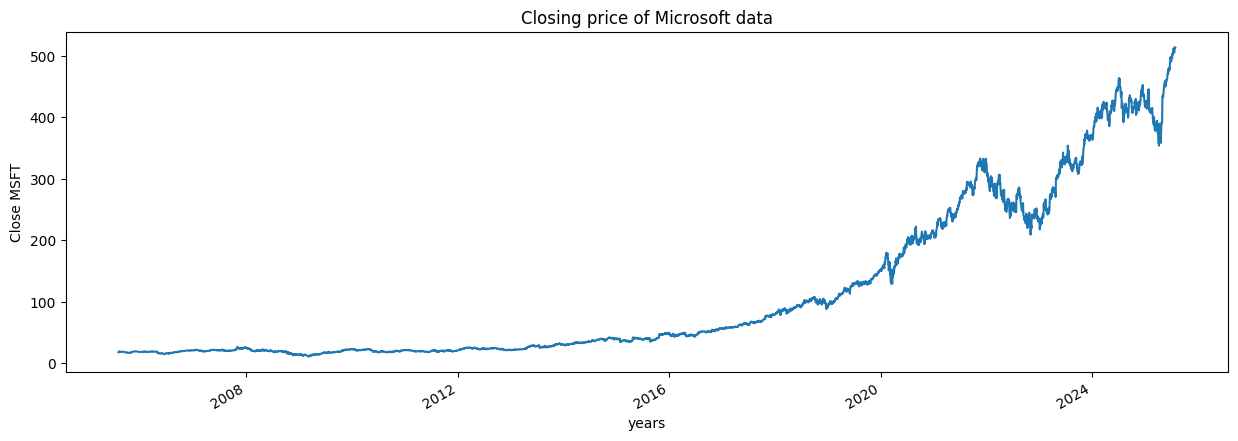

In [11]:
plt.figure(figsize = (15, 5))
microsoft_data["Close"]["MSFT"].plot()
plt.xlabel("years")
plt.ylabel("Close MSFT")
plt.title("Closing price of Microsoft data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Microsoft data")


In [13]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [14]:
data.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [15]:
for i in range(2005, 2025):
    print(i, list(microsoft_data.index.year).count(i))

2005 107
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [16]:
microsoft_data['MA_for_250_days'] = microsoft_data["Close"]["MSFT"].rolling(250).mean()

In [17]:
microsoft_data['MA_for_250_days'][0:250].tail()

Date
2006-07-21          NaN
2006-07-24          NaN
2006-07-25          NaN
2006-07-26          NaN
2006-07-27    18.084708
Name: MA_for_250_days, dtype: float64

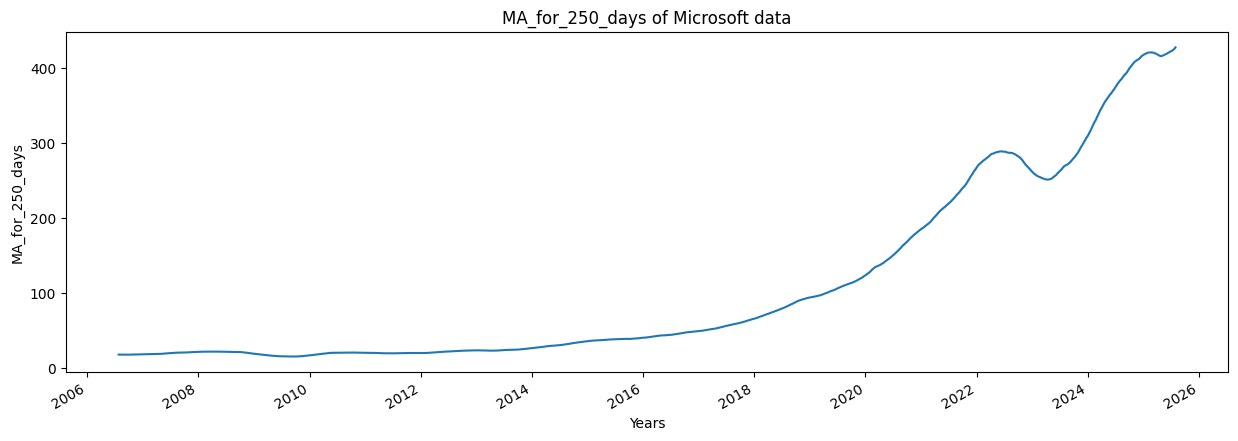

In [18]:
plot_graph((15,5), microsoft_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

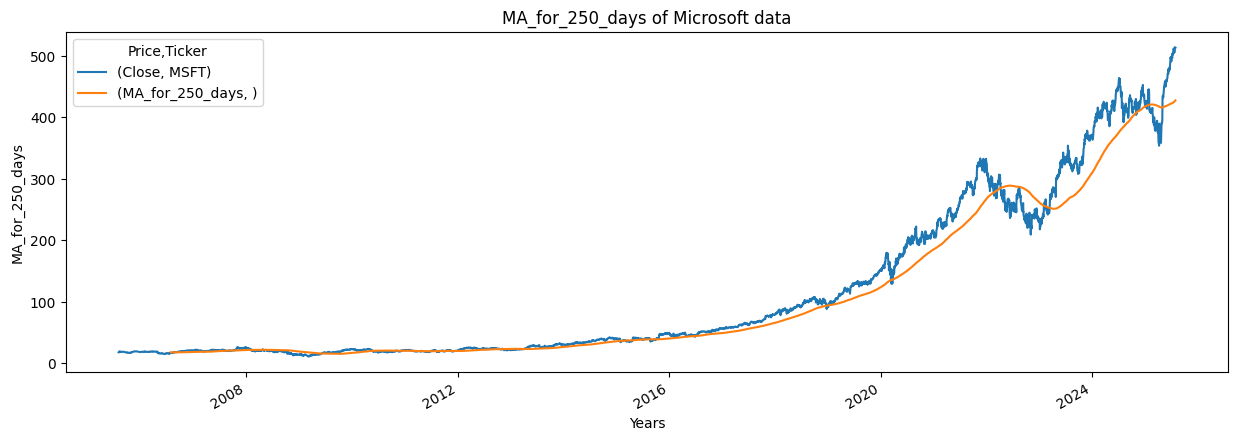

In [19]:
plot_graph((15,5), microsoft_data[['Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

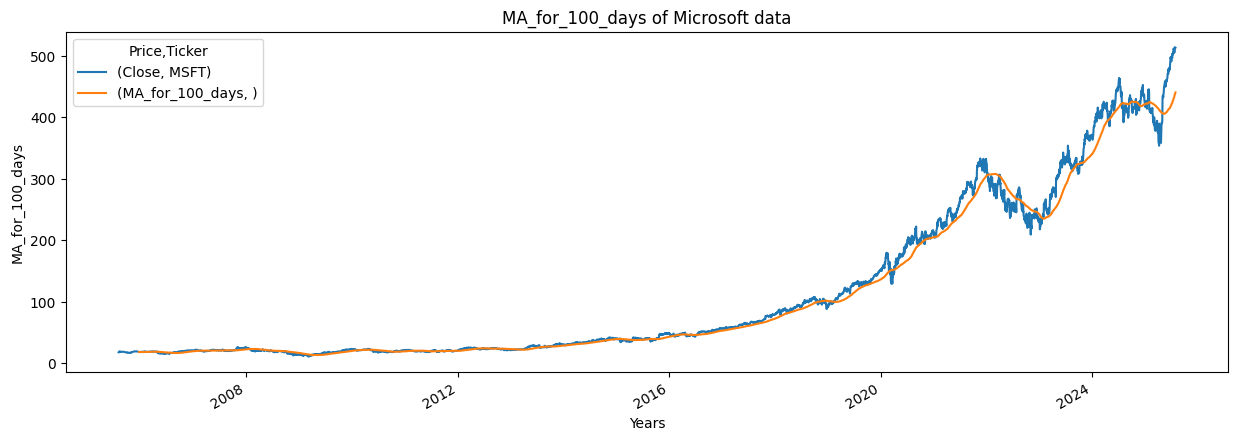

In [20]:
microsoft_data['MA_for_100_days'] = microsoft_data["Close"]["MSFT"].rolling(100).mean()
plot_graph((15,5), microsoft_data[['Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

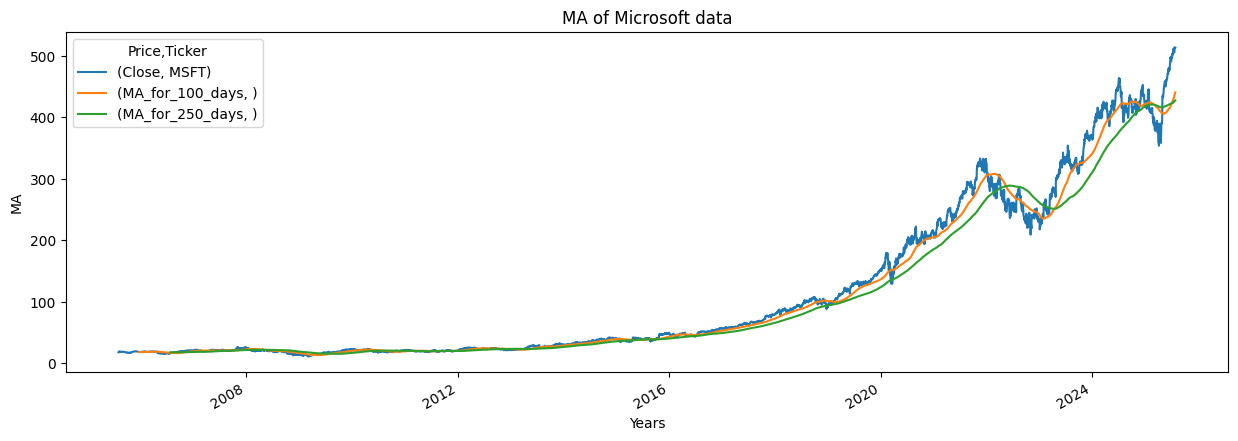

In [21]:
plot_graph((15,5), microsoft_data[['Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [22]:
microsoft_data['percentage_change_cp'] = microsoft_data["Close"]["MSFT"].pct_change()
microsoft_data[['Close', 'percentage_change_cp']].tail()

Price,Close,percentage_change_cp
Ticker,MSFT,
Date,,
2025-07-24,510.880005,0.009904
2025-07-25,513.710022,0.005539
2025-07-28,512.500000,-0.002355
2025-07-29,512.570007,0.000137
2025-07-30,513.239990,0.001307


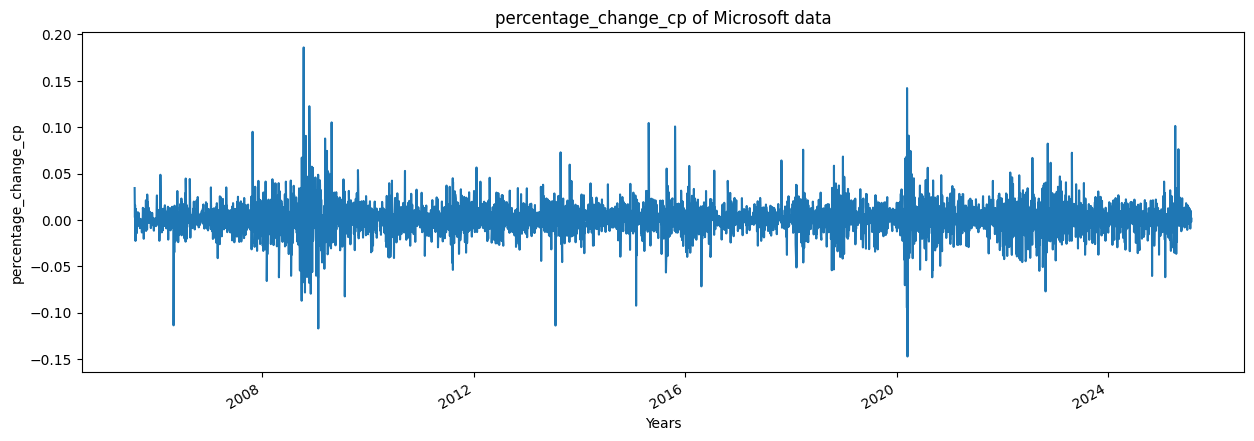

In [23]:
plot_graph((15,5), microsoft_data['percentage_change_cp'], 'percentage_change_cp')

In [24]:
close_price = microsoft_data["Close"]["MSFT"]

In [25]:
max(close_price.values), min(close_price.values)

(np.float64(513.7100219726562), np.float64(11.177743911743164))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price.values.reshape(-1, 1))
scaled_data

array([[0.01363677],
       [0.01486872],
       [0.01547781],
       ...,
       [0.99759215],
       [0.99773146],
       [0.99906467]], shape=(5031, 1))

In [27]:
len(scaled_data)

5031

In [28]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [29]:
x_data[0],y_data[0]

(array([[0.01363677],
        [0.01486872],
        [0.01547781],
        [0.01557469],
        [0.01618377],
        [0.0153117 ],
        [0.01561624],
        [0.01506252],
        [0.01550549],
        [0.01520095],
        [0.01542308],
        [0.01488163],
        [0.01517318],
        [0.0149927 ],
        [0.01485387],
        [0.01511764],
        [0.01506212],
        [0.01497882],
        [0.01528426],
        [0.01520095],
        [0.01545085],
        [0.01549249],
        [0.01577017],
        [0.01552027],
        [0.01527038],
        [0.01524262],
        [0.01503436],
        [0.01470116],
        [0.01465951],
        [0.01470116],
        [0.01452066],
        [0.01428464],
        [0.0142291 ],
        [0.01395143],
        [0.01385427],
        [0.01363212],
        [0.01314619],
        [0.01293795],
        [0.01284078],
        [0.01284078],
        [0.01293795],
        [0.0133961 ],
        [0.01377097],
        [0.01347942],
        [0.0131601 ],
        [0

In [30]:
int(len(x_data)*0.7)

3451

In [31]:
4908-100-int(len(x_data)*0.7)

1357

In [32]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)


Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 130s 37ms/step - loss: 8.2376e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 151s 44ms/step - loss: 3.5369e-05


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [44]:
predictions

array([[0.2457202 ],
       [0.24384609],
       [0.24263845],
       ...,
       [0.89646566],
       [0.8982269 ],
       [0.89873606]], shape=(1480, 1), dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[134.66006],
       [133.71828],
       [133.11139],
       ...,
       [461.68066],
       [462.56577],
       [462.82162]], shape=(1480, 1), dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[129.22032166],
       [129.25834656],
       [130.58778381],
       ...,
       [512.5       ],
       [512.57000732],
       [513.23999023]], shape=(1480, 1))

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

np.float64(16.596419806670465)

In [50]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = microsoft_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-09-10,129.220322,134.660065
2019-09-11,129.258347,133.718277
2019-09-12,130.587784,133.111389
2019-09-13,130.397858,133.367798
2019-09-16,129.457748,133.648972


<Figure size 640x480 with 0 Axes>

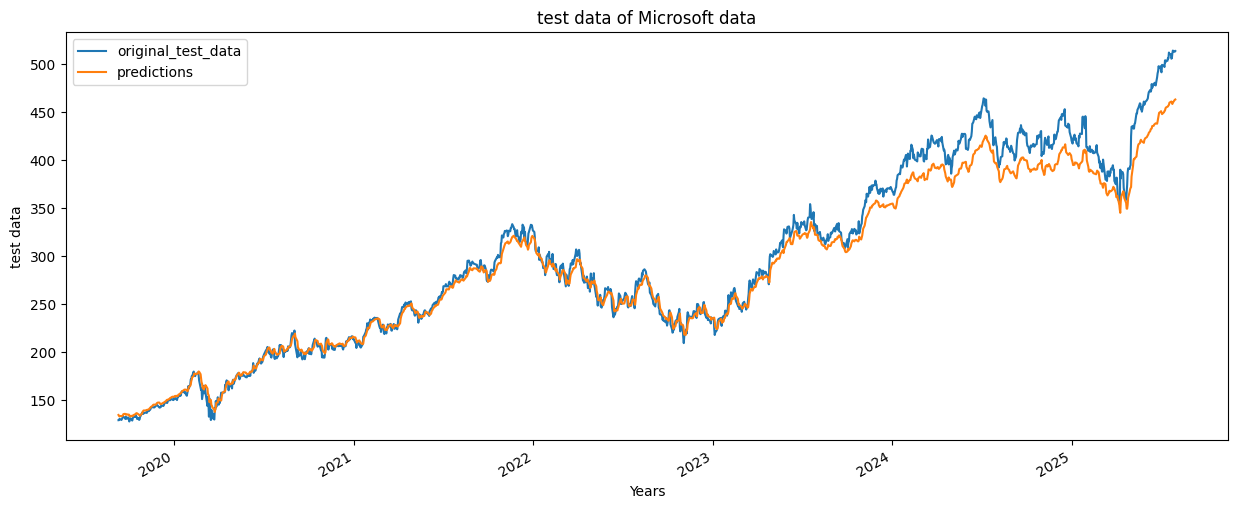

In [51]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

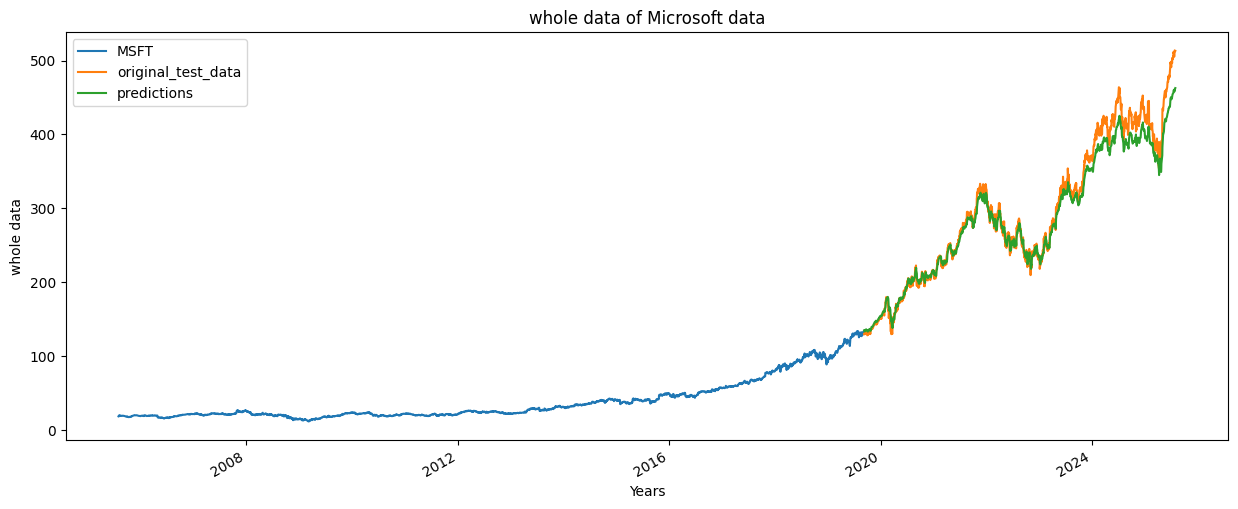

In [53]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
model.save("Latest_stock_price_model.keras")